In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV



In [3]:
df = pd.read_csv(r"C:\Users\akash\Downloads\Clean_Dataset.csv\Clean_Dataset.csv")

In [4]:
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data exploration


In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

## Data Preprocessing:


In [9]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df= df.drop("Unnamed: 0",axis=1)
df= df.drop("flight",axis=1)


In [11]:
df["class"]= df["class"].apply(lambda x :1 if x=='Business' else 0)

In [12]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [13]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [14]:
df.stops= pd.factorize(df.stops)[0]

In [15]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


One hot encoding:

In [16]:
#Airline encoding
df=df.join(pd.get_dummies(df.airline,prefix="Airline"))


In [17]:
df= df.drop("airline",axis=1)

In [18]:
#Souce city
df=df.join(pd.get_dummies(df.source_city,prefix="Source_city"))
df=df.drop("source_city",axis=1)


In [19]:
#Departure_time encoding:
df=df.join(pd.get_dummies(df.departure_time,prefix="departure_time"))
df=df.drop("departure_time",axis=1)

In [20]:
#arrival_time encoding:
df=df.join(pd.get_dummies(df.arrival_time,prefix="arrival_time"))
df=df.drop("arrival_time",axis=1)


In [21]:
#destination_city encoding:
df=df.join(pd.get_dummies(df.destination_city,prefix="destination_city"))
df=df.drop("destination_city",axis=1)

In [22]:
df


,stops,class,duration,days_left,price,Airline_AirAsia,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [23]:
#preprocessing over

## Training The Regression Model:

In [24]:
x,y= df.drop('price',axis=1), df.price

In [25]:
y


0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [26]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)


In [27]:
y_test

107411     6042
95582      9771
149334     8004
213559    54777
218094    84222
          ...  
175758     2057
169870     6314
148615    17514
179853     3864
91827      4502
Name: price, Length: 60031, dtype: int64

In [28]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [31]:
reg.score(x_test,y_test)

0.9850999160974903

## Model Evaluation 

In [37]:
y_pred=  reg.predict(x_test) 


In [45]:
print('R2 score:',r2_score(y_pred, y_test))
print('Mean squared error:',mean_squared_error(y_pred, y_test))
print('Mean absolute error:',mean_absolute_error(y_pred, y_test))
print('Root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))

R2 score: 0.9850049667881929
Mean squared error: 7610208.012410042
Mean absolute error: 1068.2626815691522
Root mean square error: 2758.660546788974


Text(0.5, 1.0, 'Predicted price vs Actual price')

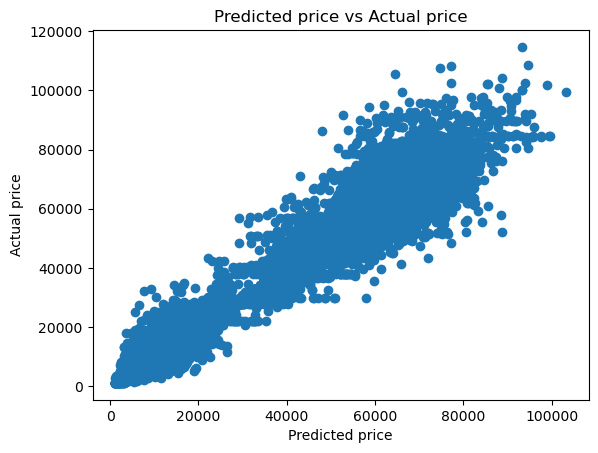

In [42]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted price vs Actual price')

In [43]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

 To list the important features:

In [48]:
importances=dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_important_features= sorted(importances.items(),key=lambda x:x[1], reverse=True)
sorted_important_features

[('class', 0.8797269112840586),
 ('duration', 0.05778295459957935),
 ('days_left', 0.018624701257065807),
 ('Airline_Air_India', 0.005369917116507729),
 ('Airline_Vistara', 0.004623231586193294),
 ('Source_city_Delhi', 0.003847414407823359),
 ('destination_city_Delhi', 0.0032637755912202616),
 ('Source_city_Mumbai', 0.0022272948080500838),
 ('destination_city_Mumbai', 0.0018858607512505766),
 ('stops', 0.0018709948552724604),
 ('destination_city_Kolkata', 0.001864195993453343),
 ('Source_city_Kolkata', 0.00173140486985345),
 ('destination_city_Hyderabad', 0.0015231807103480955),
 ('arrival_time_Evening', 0.001516872848081859),
 ('destination_city_Bangalore', 0.0012373646102267035),
 ('Source_city_Hyderabad', 0.0012357002979524409),
 ('arrival_time_Night', 0.0011420970058443277),
 ('departure_time_Evening', 0.0011170687616483353),
 ('Source_city_Bangalore', 0.0010422474640797768),
 ('arrival_time_Afternoon', 0.0010067403398318791),
 ('departure_time_Morning', 0.0009228579709569875),
 ('

## Hyper parameter tuning:

In [ ]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10], 
    'min_samples_leaf' :[1,2,4],
    'max_features': ['auto','sqrt']
}
grid_search= GridSearchCV(reg,param_grid,cv=3)
grid_search.fit(x_train,y_train)
best_estimator=grid_search.best_estimator_


pred =best_estimator.predict(x_test)
print(mean_absolute_error(y_test,pred))



In [50]:
# Randomized search method:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [52]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}



random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [54]:
best_regressor.score(x_test,y_test)

0.9860969924107195

In [55]:
best_regressor_pred= best_regressor.predict(x_test)


In [56]:
print('R2 score:',r2_score(best_regressor_pred, y_test))
print('Mean squared error:',mean_squared_error(best_regressor_pred, y_test))
print('Mean absolute error:',mean_absolute_error(best_regressor_pred, y_test))
print('Root mean square error:',math.sqrt(mean_squared_error(best_regressor_pred,y_test)))

R2 score: 0.9859623678514856
Mean squared error: 7100951.943949693
Mean absolute error: 1084.8465432075748
Root mean square error: 2664.761142006858


Text(0.5, 1.0, 'Predicted price vs Actual price')

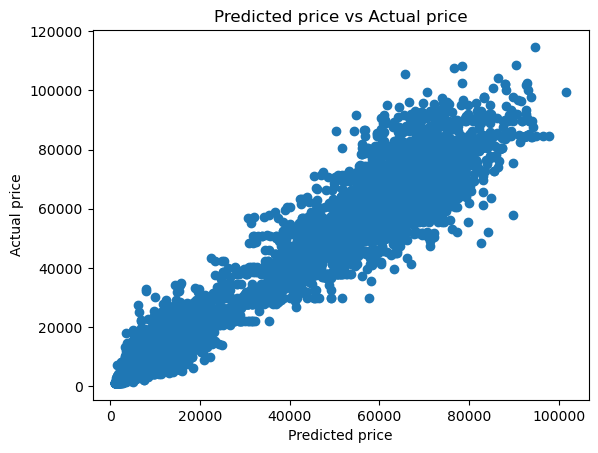

In [57]:
plt.scatter(best_regressor_pred,y_test)
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Predicted price vs Actual price')